# Tarea 3

En el siguiente Notebook vamos a poner a prueba tu conocimiento sobre el algoritmo de Mapper vistos la clase anterior. Para ello te pedimos que completes las siguientes celdas de código con las funciones necesarias para poder ejecutar el algoritmo de Mapper en las siguientes bases de datos.

In [1]:
# Instalando paquetes
!pip install kmapper
!pip install tadasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 980.7 kB/s eta 0:00:00


In [2]:
# Librerías
import pandas as pd
import kmapper as km
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
import numpy as np
import sklearn
import tadasets

## Base de Datos 1.

La siguiente base de datos contiene la información de las calificiones de Matemáticas, Redacción y Lectura de algunos estudiantes de Estados Unidos en el 2015, de igual manera contiene información de nivel de estudios de los padres, raza, sexo, alimentación en la escuela.

La base de datos se puede encontrar en el siguiente [link](https://www.kaggle.com/spscientist/students-performance-in-exams)



In [ ]:
performance_data=pd.read_csv('StudentsPerformance.csv')
performance_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
performance_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Notemos que en los tres examenes, el promedio fue de 70 puntos, con una desviación estándar de 15 puntos (aproximadamente). Esta información la tomaremos en cuenta en el futuro.


Usualmente las calificaciones tienen una distribución normal, por lo que utilizaremos la cubierta en cuartiles para visualizar la información, por ejemplo si nuestros cuartiles tienen un traslape del 2%, entonces estos serían:

$$(0,26),(24,51),(49,76),(74,100).$$

Antes de decidir que vamos a estudiar, saquemos la información de los scores que tenemos.

In [ ]:
data = performance_data[['math score','reading score','writing score']].to_numpy()

Supongamos que queremos conocer la relación que tiene el score de matemáticas con los otros dos (si este influye). Para esto, podemos utilizar mapper proyectando los datos en la variable que mide el score de matemáticas, esto es:

$$(math\,score,reading\,score,writing\,score)\mapsto math\,score.$$

Esta es una función de $\mathbb{R}^3\to\mathbb{R}.$

Como me interesa conocer que pasa con los otros dos scores, voy a utilizar su promedio para colorear los elementos del cluster.

In [ ]:
mean_outer_score=(data[:,1]+data[:,2])/2.0

In [ ]:
mapper = km.KeplerMapper(verbose=1)
# La proyección sobre el math score, corresponde a proyectar sobre la primera columna de data
projected_data = mapper.fit_transform(data, projection=[0] ) # Math score


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1000, 3)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()



In [ ]:
covering=km.Cover(n_cubes=4,perc_overlap=0.2)

In [ ]:
G = mapper.map(projected_data, data, clusterer=sklearn.cluster.KMeans(n_clusters=4),cover=covering)

Mapping on data shaped (1000, 3) using lens shaped (1000, 1)

Creating 4 hypercubes.

Created 12 edges and 16 nodes in 0:00:00.126986.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
mapper.visualize(G,
                title='Performance Data based on Math Score and Mean of other two',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = mean_outer_score,
                color_function_name = 'Mean of Reading and Writing Score',
                node_color_function=np.array(['average','std','sum','max','min']))

Wrote visualization to: mapper_visualization_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Performance Data based on Math Score and Mean of other two | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;

# Base de Datos 2:

Exploración Nivel 2:

Descargar el SP500_tickernames (1).txt

estudiaremos una base de datos de acciones bursátiles. Cabe mencionar que, la elección de los parámetros de Mapper depende del problema que estemos trabajando, y no hay un óptimo como tal, todo depende de lo que queramos estudiar. Con esta base de datos, queremos estudiar aquellas acciones que se parezcan entre ellas, es decir, que tengan un comportamiento similar en el mercado.

El índice Standard & Poor's 500 (Standard & Poor's 500 Index), también conocido como S&P 500, es uno de los índices bursátiles más importantes de Estados Unidos. Al S&P 500 se lo considera el índice más representativo de la situación real del mercado. Se trabajará un archivo de ticketmaster.

Antes de trabajar con el archivo se debe preparar:

Leer el archivo

* Definir el rango de fechas

* Obtenga los datos históricos

* Obtenga precios de cierre diarios y elimine las columnas que faltan

* Para aplicar el algoritmo de Mapper de manera adecuada, convierta esta base de datos en una matriz de datos, donde cada fila corresponde a una acción y cada columna corresponde a un día. De igual manera estandarice los datos para que todos tengan la misma escala (esto con el objeto de que nuestros no estén tan dispersos).

La razón de retorno de una inversión es la ganancia o pérdida que se obtiene en una inversión en relación con la cantidad invertida inicialmente. El porcentaje de retorno se calcula dividiendo la ganancia o pérdida neta por el costo original de la inversión. Esta tasa de rendimiento permite a los inversores comparar el éxito de una inversión con otras.
Calcula el porcentaje de retorno (de la inversión) de cada ticket sobre el rango de fechas
Proyectar utilizando funciones nuevas:

Para este caso particular usaremos una proyección dada por el isomap, que es un algoritmo de reducción de dimensionalidad. Intuitivamente, el isomap encuentra una representación de los datos en un espacio de menor dimensión, donde la distancia entre dos puntos es la distancia geodésica (distancia que minimiza la energía) a lo largo de los puntos más cercanos en los datos originales.

Notemos que a nuestra proyección le pedimos n_components=500, lo cual indica que la cubierta en la imágen tendrá 500 abiertas. Dependiente la cantidad de componentes que pidamos, nuestro gráfo cambia de complejidad (más componentes, más nodos y aristas, o menos, o inexistencia).

El UMAP sirve para dar cierta categorización a los datos cuando no son claras las categorías, el UMAP es un algoritmo avanzado que necesita de muchos requerimientos y que no son parte del curso, pero que es importante mencionar para este ejemplo. No nos centraremos mucho en lo que hace UMAP, pero quedense con la idea de la categorización.

Proyecta los datos a dos dimensiones usando dos transformaciones:
 * Coordenada 1 isomap https://en.wikipedia.org/wiki/Isomap Links to an external site.
 * Coordenada 2 UMAP https://arxiv.org/abs/1802.03426 Links to an external site.

Una vez obtenida la proyección y el número de abiertos en la cubierta de la imágen. Procede a pedir a mapper que en nuestra proyección, nos haga un clustering de los datos y nos cree el gráfo. Para ello, usa la función mapper.map().

En este caso usamos la proyección descrita anteriormente, y como clusterer usaremos DBSCAN con la métrica del coseno. La métrica del coseno nos indica que tan parecidos son dos vectores o dos pendientes. Como queremos conocer el comportamiento de las acciones (sus ascensos y descensos) esta métrica es ideal.

Una vez que ya apliques el algoritmo a nuestros datos, vamos a visualizarlos. Para ello, usa la función mapper.visualize()

En teoría, si todo salió bien, cada componente conexa del gráfo debería contener información de comportamiento similar en los elementos del nodo.



Trabajando con la base de datos obtenida

In [56]:
fin_df=pd.read_csv('dataset.csv')
fin_df.head()

,stock,2024-03-18 00:00:00-04:00,2024-03-19 00:00:00-04:00,2024-03-20 00:00:00-04:00,2024-03-21 00:00:00-04:00,2024-03-22 00:00:00-04:00,2024-03-25 00:00:00-04:00,2024-03-26 00:00:00-04:00,2024-03-27 00:00:00-04:00,2024-03-28 00:00:00-04:00,...,2024-04-03 00:00:00-04:00,2024-04-04 00:00:00-04:00,2024-04-05 00:00:00-04:00,2024-04-08 00:00:00-04:00,2024-04-09 00:00:00-04:00,2024-04-10 00:00:00-04:00,2024-04-11 00:00:00-04:00,2024-04-12 00:00:00-04:00,2024-04-15 00:00:00-04:00,2024-04-16 00:00:00-04:00
0,A,145.853058,147.150940,147.041122,148.498764,147.210846,145.323914,144.175781,147.130981,145.273987,...,143.729996,141.339996,144.119995,144.460007,147.399994,144.160004,145.000000,140.729996,140.220001,137.550003
1,AAL,14.110000,13.930000,14.570000,14.780000,14.820000,14.920000,14.920000,15.300000,15.350000,...,14.160000,13.830000,13.760000,13.900000,13.950000,13.410000,13.620000,13.150000,12.940000,13.020000
2,AAP,83.919991,83.561142,84.567894,86.172737,85.484955,83.979790,83.979790,85.046364,84.817093,...,83.890083,79.005798,77.091949,77.879417,78.208359,77.699997,74.349998,70.500000,70.080002,71.349998
3,AAPL,173.720001,176.080002,178.669998,171.369995,172.279999,170.850006,169.710007,173.309998,171.479996,...,169.649994,168.820007,169.580002,168.449997,169.669998,167.779999,175.039993,176.550003,172.690002,169.220001
4,ABBV,176.838501,177.997681,174.639053,175.857666,176.798874,176.878128,177.532028,178.681305,180.415100,...,175.689240,166.346481,168.427063,168.228912,168.565765,167.466034,165.970001,162.279999,161.669998,163.149994


In [57]:
fin_df.describe()

,2024-03-18 00:00:00-04:00,2024-03-19 00:00:00-04:00,2024-03-20 00:00:00-04:00,2024-03-21 00:00:00-04:00,2024-03-22 00:00:00-04:00,2024-03-25 00:00:00-04:00,2024-03-26 00:00:00-04:00,2024-03-27 00:00:00-04:00,2024-03-28 00:00:00-04:00,2024-04-01 00:00:00-04:00,...,2024-04-03 00:00:00-04:00,2024-04-04 00:00:00-04:00,2024-04-05 00:00:00-04:00,2024-04-08 00:00:00-04:00,2024-04-09 00:00:00-04:00,2024-04-10 00:00:00-04:00,2024-04-11 00:00:00-04:00,2024-04-12 00:00:00-04:00,2024-04-15 00:00:00-04:00,2024-04-16 00:00:00-04:00
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,210.378754,212.047042,214.191374,215.915486,214.938574,213.852853,213.806462,216.227581,216.808147,215.418606,...,213.629667,210.769603,212.974538,213.211725,213.755746,210.555201,210.994998,208.033298,205.861755,205.316016
std,458.013824,465.809362,474.976520,479.045321,477.619648,474.191406,474.045214,478.121049,480.825305,477.084530,...,473.694336,465.011410,472.333519,470.964413,473.639881,462.394775,467.247396,465.619426,461.027409,457.932874
min,1.610000,1.690000,1.770000,1.710000,1.610000,1.610000,1.550000,1.580000,1.560000,1.460000,...,1.420000,1.340000,1.340000,1.370000,1.460000,1.380000,1.440000,1.380000,1.370000,1.350000
25%,60.825001,61.183577,61.661596,62.622501,61.890371,62.058630,61.740000,62.995001,63.470001,62.964998,...,62.019999,61.339998,61.695000,62.680000,63.830000,62.590000,62.029999,60.575001,59.670000,59.142500
50%,117.230003,117.870003,118.599998,120.540001,118.620003,118.959999,119.580002,121.529999,122.800003,122.169998,...,119.519997,120.279999,121.370003,120.550003,121.180000,119.599998,118.879997,117.650002,115.980003,114.355003
75%,219.144997,218.295006,217.639999,223.110001,220.737503,219.000000,216.525002,220.974998,221.279999,219.574997,...,215.805000,216.695000,218.620003,217.589996,219.680000,215.279999,216.209999,212.114998,208.840004,209.425003
max,7630.839844,7791.540039,7958.450195,8001.959961,7971.709961,7907.049805,7865.000000,7980.740234,8099.959961,8026.270020,...,7914.299805,7790.000000,7907.890137,7871.149902,7972.850098,7658.129883,7757.180176,7817.979980,7761.439941,7671.879883


In [76]:
fin_df2 = fin_df.drop(columns=['stock'])

In [77]:
# Para normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_std=True)
normalized_df = scaler.fit_transform(fin_df2)
normalized_df = pd.DataFrame(normalized_df, columns=fin_df2.columns)

In [78]:
normalized_df.describe()

,2024-03-18 00:00:00-04:00,2024-03-19 00:00:00-04:00,2024-03-20 00:00:00-04:00,2024-03-21 00:00:00-04:00,2024-03-22 00:00:00-04:00,2024-03-25 00:00:00-04:00,2024-03-26 00:00:00-04:00,2024-03-27 00:00:00-04:00,2024-03-28 00:00:00-04:00,2024-04-01 00:00:00-04:00,...,2024-04-03 00:00:00-04:00,2024-04-04 00:00:00-04:00,2024-04-05 00:00:00-04:00,2024-04-08 00:00:00-04:00,2024-04-09 00:00:00-04:00,2024-04-10 00:00:00-04:00,2024-04-11 00:00:00-04:00,2024-04-12 00:00:00-04:00,2024-04-15 00:00:00-04:00,2024-04-16 00:00:00-04:00
count,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,...,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02,4.670000e+02
mean,-2.662633e-17,3.803762e-18,-2.282257e-17,1.141129e-17,-3.803762e-18,-3.803762e-18,-7.607524e-18,1.901881e-17,2.662633e-17,3.803762e-18,...,-3.803762e-18,1.141129e-17,1.901881e-17,3.043010e-17,-2.282257e-17,-1.901881e-17,-3.803762e-18,-3.423386e-17,2.662633e-17,-3.423386e-17
std,1.001072e+00,1.001072e+00,1.001072e+00,1.001072e+00,1.001072e+00,1.001072e+00,1.001072e+00,1.001072e+00,1.001072e+00,1.001072e+00,...,1.001072e+00,1.001072e+00,1.001072e+00,1.001072e+00,1.001072e+00,1.001072e+00,1.001072e+00,1.001072e+00,1.001072e+00,1.001072e+00
min,-4.563020e-01,-4.520790e-01,-4.477046e-01,-4.476303e-01,-4.471285e-01,-4.480690e-01,-4.482359e-01,-4.494213e-01,-4.481440e-01,-4.489520e-01,...,-4.484690e-01,-4.508582e-01,-4.485422e-01,-4.502865e-01,-4.487025e-01,-4.528587e-01,-4.489693e-01,-4.443004e-01,-4.440323e-01,-4.458836e-01
25%,-3.268769e-01,-3.242212e-01,-3.214756e-01,-3.203400e-01,-3.207831e-01,-3.204550e-01,-3.211287e-01,-3.208328e-01,-3.192481e-01,-3.198953e-01,...,-3.204012e-01,-3.216907e-01,-3.206246e-01,-3.199672e-01,-3.168790e-01,-3.203407e-01,-3.191559e-01,-3.170324e-01,-3.174400e-01,-3.195452e-01
50%,-2.035935e-01,-2.023962e-01,-2.014708e-01,-1.993084e-01,-2.018800e-01,-2.003297e-01,-1.989842e-01,-1.982743e-01,-1.957238e-01,-1.956647e-01,...,-1.988848e-01,-1.948052e-01,-1.941483e-01,-1.969599e-01,-1.956656e-01,-1.969156e-01,-1.973554e-01,-1.943223e-01,-1.951687e-01,-1.988470e-01
75%,1.916021e-02,1.342752e-02,7.268409e-03,1.503455e-02,1.215433e-02,1.086622e-02,5.740918e-03,9.939970e-03,9.310341e-03,8.721407e-03,...,4.597196e-03,1.275614e-02,1.196510e-02,9.306364e-03,1.252134e-02,1.022906e-02,1.117308e-02,8.775573e-03,6.466954e-03,8.982525e-03
max,1.621877e+01,1.628911e+01,1.632199e+01,1.627068e+01,1.625789e+01,1.624122e+01,1.615753e+01,1.625705e+01,1.641263e+01,1.638961e+01,...,1.627406e+01,1.631650e+01,1.630875e+01,1.627756e+01,1.639941e+01,1.612380e+01,1.616762e+01,1.636123e+01,1.640614e+01,1.632242e+01


In [79]:
# Array con datos normalizados
fin_df3 = normalized_df.to_numpy()
#fin_df3 = fin_df2.to_numpy()

In [80]:
# Array con datos no normalizados
fin_df4 = fin_df2.to_numpy()

In [81]:
# Importando isomap para realizar la primera tranformación
from sklearn.manifold import Isomap

In [88]:
# Mapeo en isomap
isomap = Isomap(n_components=2, n_neighbors=20)
coord1 = isomap.fit_transform(normalized_df.T)

In [97]:
#Mapper aplicado con isomap y proyección
mapper_iso = km.KeplerMapper(verbose=1)

projected_data = mapper_iso.fit_transform(coord1, projection=[0,1], distance_matrix='cosine')

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: cosine
	Scalers: MinMaxScaler()
..Projecting on data shaped (21, 2)
Created distance matrix, shape: (21, 21), with distance metric `cosine`

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()



In [98]:
# Cubiertas
covering=km.Cover(n_cubes=6,perc_overlap=0.2)

In [100]:
# Utilizando DBSCAN como método de clustering
G = mapper_iso.map(projected_data, normalized_df.T, clusterer=sklearn.cluster.DBSCAN(),cover=covering)

Mapping on data shaped (21, 467) using lens shaped (21, 2)

Creating 36 hypercubes.

Created 0 edges and 2 nodes in 0:00:00.029243.


In [101]:
# Visualización del mapper
mapper_iso.visualize(G,
                title='Mapper para dataset de datos financieros con isomap',
                 node_color_function=np.array(['average','std','sum','max','min']))

Wrote visualization to: mapper_visualization_output.html


/usr/local/lib/python3.10/dist-packages/kmapper/visuals.py:344: RuntimeWarning: invalid value encountered in scalar divide
  height = np.floor(((bar / max_bucket_value) * 100) + 0.5)
/usr/local/lib/python3.10/dist-packages/kmapper/visuals.py:345: RuntimeWarning: invalid value encountered in scalar divide
  perc = round((bar / sum_bucket_value) * 100.0, 1)


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Mapper para dataset de datos financieros con isomap | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\n

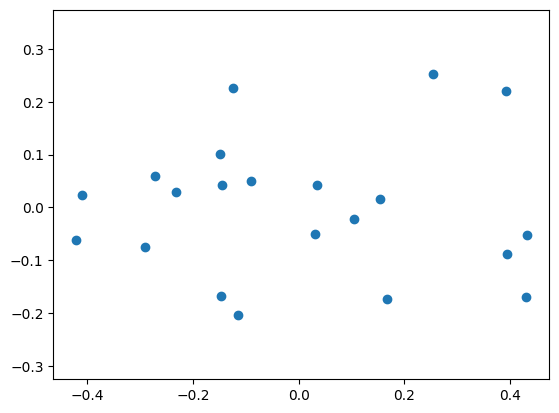

In [102]:
# Gráfica del mapeo en isomap
plt.scatter(coord1[:,0], coord1[:,1])
plt.axis('equal')
plt.show()

In [103]:
# Instalando e importando UMAP para realizar la segunda tranformación
!pip install umap-learn
import umap

In [104]:
# Mapeo en UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=10)
coord2 = umap_model.fit_transform(normalized_df.T)

In [105]:
#Mapper aplicado con umap y proyección
mapper_umap = km.KeplerMapper(verbose=1)

projected_data = mapper_umap.fit_transform(coord2, projection=[0,1], distance_matrix='cosine')

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: cosine
	Scalers: MinMaxScaler()
..Projecting on data shaped (21, 2)
Created distance matrix, shape: (21, 21), with distance metric `cosine`

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()



In [38]:
# Cubiertas
covering=km.Cover(n_cubes=6,perc_overlap=0.2)

In [106]:
# Utilizando DBSCAN como método de clustering
G = mapper_umap.map(projected_data, normalized_df.T, clusterer=sklearn.cluster.DBSCAN(),cover=covering)

Mapping on data shaped (21, 467) using lens shaped (21, 2)

Creating 36 hypercubes.

Created 2 edges and 3 nodes in 0:00:00.022484.


In [107]:
# Visualización del mapper
mapper_umap.visualize(G,
                title='Mapper para dataset de datos financieros con umap',
                 node_color_function=np.array(['average','std','sum','max','min']))

Wrote visualization to: mapper_visualization_output.html


/usr/local/lib/python3.10/dist-packages/kmapper/visuals.py:344: RuntimeWarning: invalid value encountered in scalar divide
  height = np.floor(((bar / max_bucket_value) * 100) + 0.5)
/usr/local/lib/python3.10/dist-packages/kmapper/visuals.py:345: RuntimeWarning: invalid value encountered in scalar divide
  perc = round((bar / sum_bucket_value) * 100.0, 1)


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Mapper para dataset de datos financieros con umap | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4

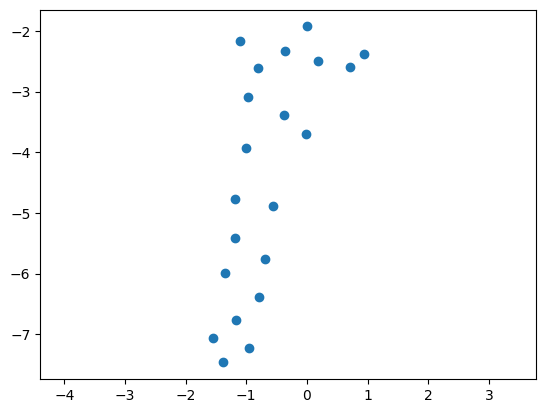

In [108]:
# Gráfica del mapeo en UMAP
plt.scatter(coord2[:,0], coord2[:,1])
plt.axis('equal')
plt.show()

In [109]:
# Convirtiendo el array en dataframe
fin_df4 = pd.DataFrame(fin_df3)

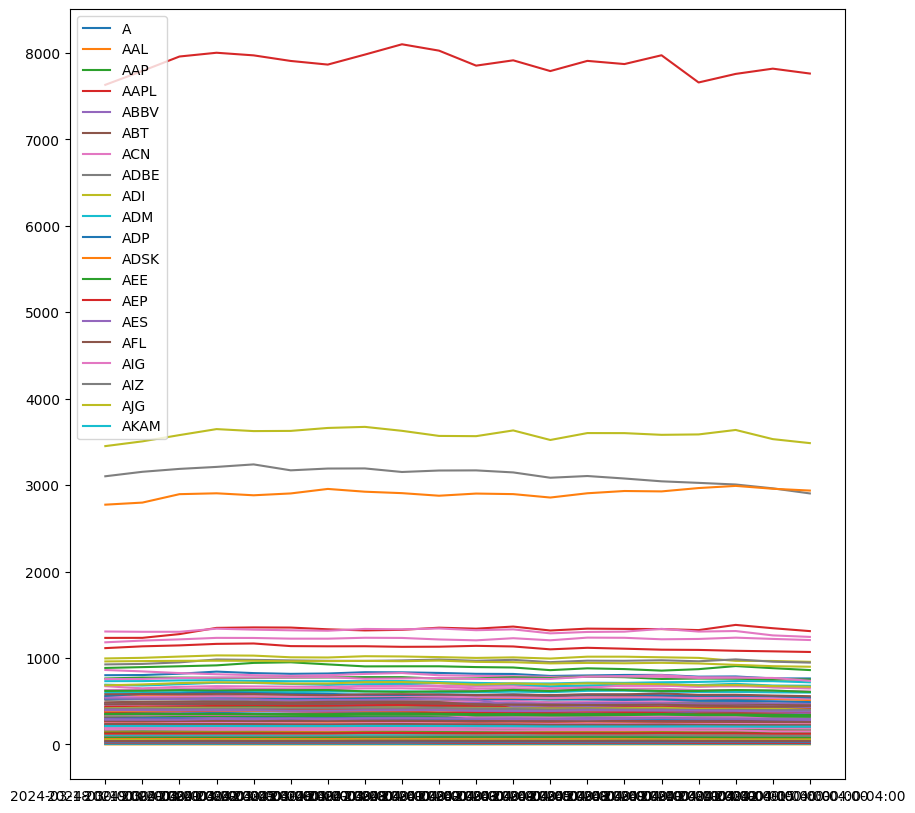

In [125]:
# Gráfica de un subconjunto de los datos
fin_df5 = fin_df2.iloc[:,0:20]
plt.figure(figsize=(10,10))
plt.plot(fin_df5.T)
plt.legend(fin_df['stock'][0:20])
plt.show()